In [15]:
import os
os.chdir(r'D:\Desktop\ML\Projects\Kaggle PIMA Diabetes Detection')

In [16]:
os.listdir()

['diabetes.csv']

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('diabetes.csv')

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.isnull().sum() 
#there are no missing values.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
df.dtypes
#there is only numerical data, no categorical features.

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [22]:
import seaborn as sns

In [23]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
df.shape

(768, 9)

In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
# sns.pairplot(df,hue='Outcome')

## Making a simple base model first:

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,auc,confusion_matrix,classification_report

In [28]:
X = df.drop('Outcome',axis=1)

In [29]:
y = df['Outcome']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [31]:
lr = LogisticRegression(max_iter=1000).fit(X_train,y_train)

In [32]:
y_pred = lr.predict(X_test)

In [33]:
lr.score(X_train,y_train)

0.7783985102420856

In [34]:
accuracy_score(y_pred,y_test)

0.7445887445887446

In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.75      0.81       173
           1       0.49      0.74      0.59        58

    accuracy                           0.74       231
   macro avg       0.70      0.74      0.70       231
weighted avg       0.80      0.74      0.76       231



<AxesSubplot:>

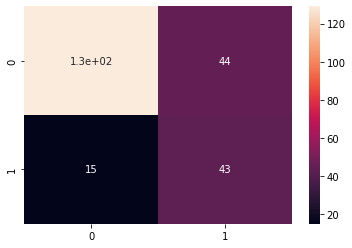

In [36]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

## EDA + Feature extraction + Feature scaling:

In [37]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [38]:
#since there are uneven number of positives and negatives, we will need to do either undersampling or oversampling.
#In this case there is a less number of records so we should do oversampling.

In [39]:
# Random oversampling just increases the size of the training data set through repetition of the original examples. 
# It does not cause any increase in the variety of training examples.

# Oversampling using SMOTE not only increases the size of the training data set, it also increases the variety.

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
X_resampled,y_resampled = SMOTE(k_neighbors=5).fit_resample(X,y)

In [42]:
y_resampled.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [43]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=10)

In [44]:
lr = LogisticRegression(max_iter=1000).fit(X_train2,y_train2)

In [45]:
y_pred2 = lr.predict(X_test2)

In [46]:
print(classification_report(y_pred2,y_test2))

              precision    recall  f1-score   support

           0       0.81      0.71      0.75       158
           1       0.71      0.81      0.76       142

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



<AxesSubplot:>

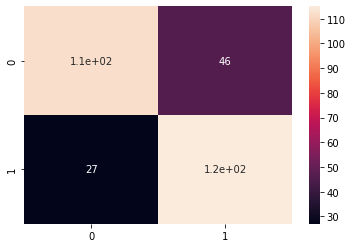

In [47]:
sns.heatmap(confusion_matrix(y_pred2,y_test2),annot=True)

In [48]:
#here we can see that the recall values are better. 
#We need to focus on the TPR as the problem is related to diabetes and the False Negatives should be decreased.

### So we have solved the problem of imbalanced classification.
### Now we will see outlier treatment.

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

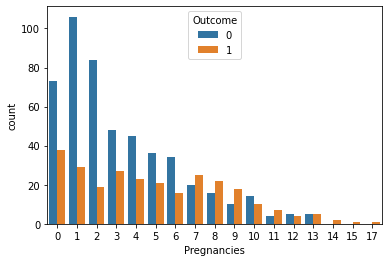

In [50]:
sns.countplot(x='Pregnancies',data=df,hue='Outcome')

In [51]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Text(0, 0.5, 'Count')

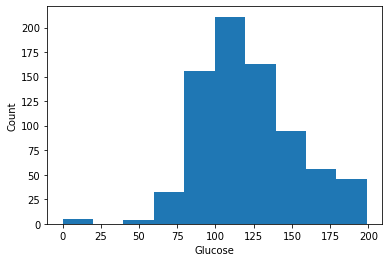

In [52]:
plt.hist(df['Glucose'])
plt.xlabel('Glucose')
plt.ylabel('Count')

<AxesSubplot:>

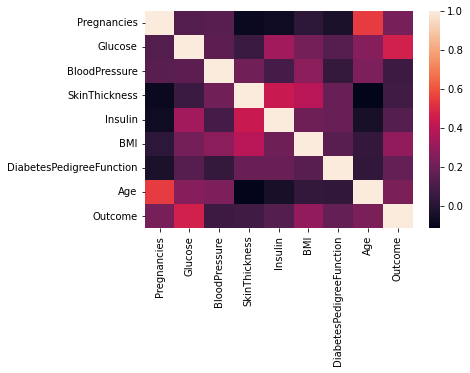

In [53]:
sns.heatmap(df.corr())

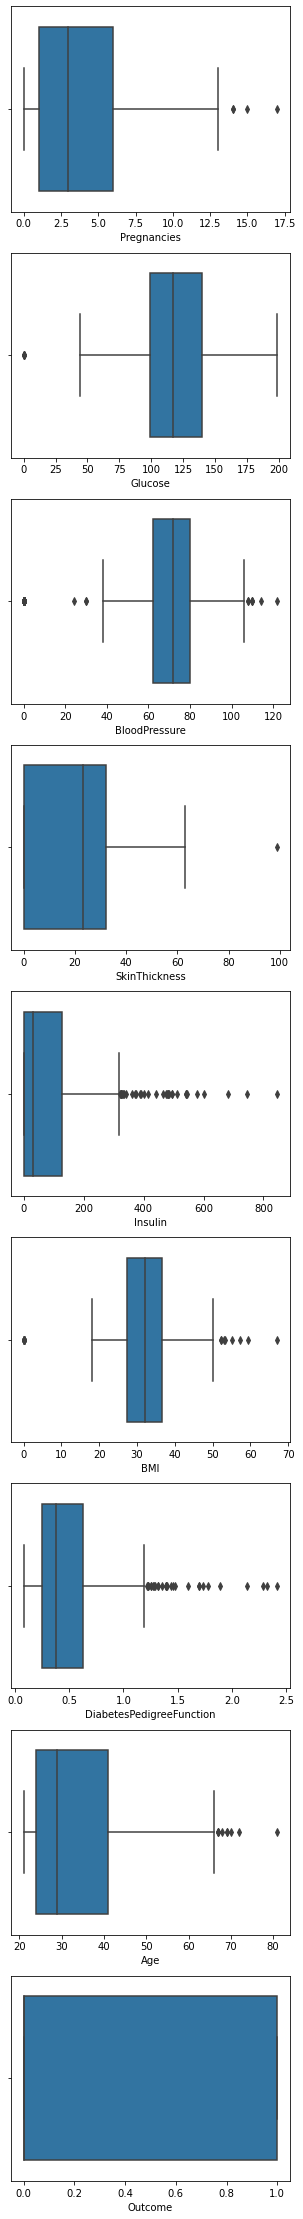

In [54]:
fig,axes = plt.subplots(9,1,figsize=(5,40))
i=0
for x in df.columns:
    sns.boxplot(x=x,data=df,ax=axes[i])
    i+=1

In [55]:
import numpy as np

In [56]:
df.shape

(768, 9)

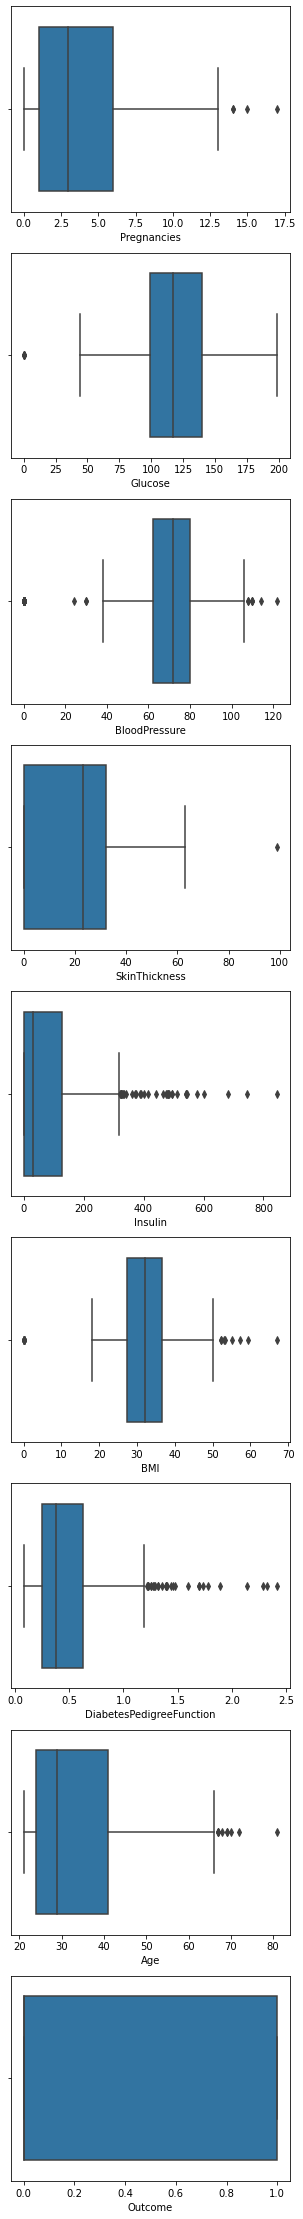

In [61]:
fig,axes = plt.subplots(9,1,figsize=(5,40))
i=0
for x in df.columns:
    sns.boxplot(x=x,data=df,ax=axes[i])
    i+=1

In [62]:
df2 = df[df['Pregnancies']<=12]

In [63]:
df2 = df2[df2['Glucose']>25]

In [64]:
df2 = df2[df2['BloodPressure']>=40]

In [65]:
df2 = df2[df2['BloodPressure']<=110]

In [66]:
df2 = df2[df2['SkinThickness']<80]

In [67]:
df2 = df2[df2['Insulin']<=420]

In [68]:
df2 = df2[(df2['BMI']<=50) & (df2['BMI']>=10)]

In [69]:
df2 = df2[df2['DiabetesPedigreeFunction']<=1.5]

In [70]:
df2 = df2[df2['Age']<70]

In [71]:
#By this, most of the outliers have been removed.

In [72]:
df2.shape

(674, 9)

In [73]:
df2['Outcome'].value_counts()

0    454
1    220
Name: Outcome, dtype: int64

In [74]:
# Getting the logistic regression results again:

In [75]:
X2 = df2.drop('Outcome',axis=1)

In [76]:
y2 = df2['Outcome']

In [77]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(X2,y2,test_size=0.3,random_state=10)

In [78]:
lr2 = LogisticRegression(max_iter=1000).fit(X_train3,y_train3)

In [79]:
y_pred3 = lr2.predict(X_test3)

In [80]:
print(classification_report(y_pred3,y_test3))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       150
           1       0.58      0.70      0.63        53

    accuracy                           0.79       203
   macro avg       0.73      0.76      0.74       203
weighted avg       0.80      0.79      0.79       203



<AxesSubplot:>

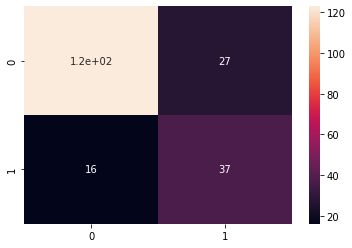

In [81]:
sns.heatmap(confusion_matrix(y_pred3,y_test3),annot=True)

In [82]:
df2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.158467,0.213793,-0.087789,-0.069229,0.036735,0.023949,0.564804,0.231255
Glucose,0.158467,1.000000,0.232847,0.000790,0.271443,0.201437,0.094301,0.266509,0.481218
BloodPressure,0.213793,0.232847,1.000000,0.032317,-0.064127,0.308402,0.033539,0.364682,0.179614
SkinThickness,-0.087789,0.000790,0.032317,1.000000,0.464338,0.392500,0.146182,-0.154161,0.061925
Insulin,-0.069229,0.271443,-0.064127,0.464338,1.000000,0.178088,0.173915,-0.082143,0.118204
BMI,0.036735,0.201437,0.308402,0.392500,0.178088,1.000000,0.119411,0.060117,0.287870
DiabetesPedigreeFunction,0.023949,0.094301,0.033539,0.146182,0.173915,0.119411,1.000000,0.066562,0.209212
Age,0.564804,0.266509,0.364682,-0.154161,-0.082143,0.060117,0.066562,1.000000,0.246929
Outcome,0.231255,0.481218,0.179614,0.061925,0.118204,0.287870,0.209212,0.246929,1.000000


In [83]:
#There is strong positive correlation between Pregnancies and Age.
#Logistic regression is Prone to Correlation between features.
#So lets try different models.

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
model = RandomForestClassifier().fit(X_train2,y_train2)
y_pred = model.predict(X_test2)
print(classification_report(y_pred,y_test2))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       144
           1       0.81      0.84      0.83       156

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [86]:
#a serious drawback of SVM is that it is sensitive to outliers. So we train it on df2 data
model = SVC().fit(X_train3,y_train3)
y_pred = model.predict(X_test3)
print(classification_report(y_pred,y_test3))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       162
           1       0.45      0.71      0.55        41

    accuracy                           0.77       203
   macro avg       0.68      0.75      0.70       203
weighted avg       0.82      0.77      0.78       203



In [87]:
model = DecisionTreeClassifier(criterion='gini').fit(X_train2,y_train2)
y_pred = model.predict(X_test2)
print(classification_report(y_pred,y_test2))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       143
           1       0.76      0.78      0.77       157

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [88]:
model = KNeighborsClassifier().fit(X_train2,y_train2)
y_pred = model.predict(X_test2)
print(classification_report(y_pred,y_test2))
#worked better on resampled data and with outliers.

              precision    recall  f1-score   support

           0       0.59      0.74      0.66       111
           1       0.82      0.70      0.75       189

    accuracy                           0.71       300
   macro avg       0.70      0.72      0.71       300
weighted avg       0.73      0.71      0.72       300



In [89]:
model = GaussianNB().fit(X_train3,y_train3)
y_pred = model.predict(X_test3)
print(classification_report(y_pred,y_test3))
#Sensitive to outliers, so training on df2

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       148
           1       0.56      0.65      0.61        55

    accuracy                           0.77       203
   macro avg       0.71      0.73      0.72       203
weighted avg       0.78      0.77      0.77       203



In [90]:
model = xgboost.XGBClassifier().fit(X_train2,y_train2)
y_pred = model.predict(X_test2)
print(classification_report(y_pred,y_test2))
#worked best on oversampled data with outliers.

C:\Users\subod\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       135
           1       0.81      0.79      0.80       165

    accuracy                           0.79       300
   macro avg       0.78      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [91]:
model = AdaBoostClassifier().fit(X_train2,y_train2)
y_pred = model.predict(X_test2)
print(classification_report(y_pred,y_test2))
#Worked best on oversampled data with outliers.

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       142
           1       0.79      0.80      0.80       158

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [92]:
model = GradientBoostingClassifier().fit(X_train2,y_train2)
y_pred = model.predict(X_test2)
print(classification_report(y_pred,y_test2))
#Not much effect of oversampling and removing outliers.

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       141
           1       0.78      0.79      0.79       159

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [93]:
# So till now after oversampling and removing outliers:
#(The accuracies keep varying a bit)    

In [94]:
print("{:>30}{:>20}".format("Model","Best Accuracy"))
print("{:>30}{:>20}".format("Logistic Regression","79%"))
print("{:>30}{:>20}".format("Random Forest Classifier","80%"))
print("{:>30}{:>20}".format("Support Vector Classifier","77%"))
print("{:>30}{:>20}".format("Decision Tree Classifier","73%"))
print("{:>30}{:>20}".format("K Neighbours Classifier","73%"))
print("{:>30}{:>20}".format("GaussianNB","77%"))
print("{:>30}{:>20}".format("XGBoost Classifier","79%"))
print("{:>30}{:>20}".format("AdaBoost Classifier","77%"))
print("{:>30}{:>20}".format("Gradient Boosting Classifier","78%"))

                         Model       Best Accuracy
           Logistic Regression                 79%
      Random Forest Classifier                 80%
     Support Vector Classifier                 77%
      Decision Tree Classifier                 73%
       K Neighbours Classifier                 73%
                    GaussianNB                 77%
            XGBoost Classifier                 79%
           AdaBoost Classifier                 77%
  Gradient Boosting Classifier                 78%


In [95]:
#Now we shall do hyperparameter tuning for all models that performed well.

# Hyperparameter Tuning

In [96]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

### 1. Logistic Regression

In [97]:
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg','lbfgs','liblinear']
penalty = ['l2']
c_values = [100,10,1,0.1,0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
grid_search = GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_resampled,y_resampled)

In [98]:
grid_result.best_score_,grid_result.best_params_

(0.7569999999999999, {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'})

### 2. Random Forest Classifier

In [99]:
model = RandomForestClassifier()
n_estimators = [100,300,500]
max_depth = [5,8,15,25]
min_samples_split = [2,5,10,15]
min_samples_leaf = [1,2,5,10]

grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid_search = GridSearchCV(model,grid,verbose=1,cv=2,n_jobs=-1)
grid_result = grid_search.fit(X_resampled,y_resampled)
grid_result.best_score_,grid_result.best_params_

Fitting 2 folds for each of 192 candidates, totalling 384 fits


(0.8200000000000001,
 {'max_depth': 25,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 300})

In [100]:
#This one took more time.

### 3. SVC

In [101]:
model = SVC()
grid = {'C':[0.1,1,10,100,1000],
       'gamma':[1,0.1,0.01,0.001,0.0001],
       'kernel':['rbf']}
grid_search = GridSearchCV(model,grid,verbose=1)
grid_result = grid_search.fit(X2,y2)
#used the data which does not contain outliers.
grid_result.best_score_,grid_result.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


(0.7655942509673853, {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'})

### 4. Gaussian NB

In [102]:
model = GaussianNB()
grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
grid_search = GridSearchCV(model,grid,verbose=1,cv=10,n_jobs=-1)
grid_result = grid_search.fit(X_resampled,y_resampled)
grid_result.best_score_,grid_result.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


(0.75, {'var_smoothing': 1.232846739442066e-06})

### 5. XGBoost Classifier

In [103]:
model = xgboost.XGBClassifier()
grid = {
    'max_depth':[3,5,7,9,11],
    'min_child_weight':[1,2,4,6,8,10],
    'gamma':[0,0.1,0.2,0.3,0.4],
    'reg_alpha':[0,0.001,0.005,0.01,0.05],
    'learning_rate':[0.1,0.001],
}
grid_search = GridSearchCV(model,grid,verbose=2,cv=2,n_jobs=-1)
grid_result = grid_search.fit(X_resampled,y_resampled)
grid_result.best_score_,grid_result.best_params_

Fitting 2 folds for each of 1500 candidates, totalling 3000 fits
[20:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\subod\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(0.815,
 {'gamma': 0.2,
  'learning_rate': 0.1,
  'max_depth': 11,
  'min_child_weight': 1,
  'reg_alpha': 0.05})

### 6. AdaBoost Classifier

In [104]:
model = AdaBoostClassifier()
grid = {
    'n_estimators':[10,50,100,500],
    'learning_rate':[0.01,0.1]
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(model,grid,verbose=2,cv=cv,n_jobs=-1)
grid_result = grid_search.fit(X_resampled,y_resampled)
grid_result.best_score_,grid_result.best_params_

Fitting 30 folds for each of 8 candidates, totalling 240 fits


(0.7846666666666666, {'learning_rate': 0.1, 'n_estimators': 500})

### 7. Gradient Boosting Classifier

In [105]:
model = GradientBoostingClassifier()
grid = {
    'n_estimators':[10,20,50,80,100],
    'learning_rate':[0.01,0.1],
    'max_depth':[3,5,7,10],
    
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(model,grid,verbose=2,cv=cv,n_jobs=-1)
grid_result = grid_search.fit(X_resampled,y_resampled)
grid_result.best_score_,grid_result.best_params_

Fitting 30 folds for each of 40 candidates, totalling 1200 fits


(0.8126666666666666,
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 80})

#### Best Accuracies in Hyperparameter Tuning:

In [106]:
print("{:>30}{:>20}".format("Model","Best Accuracy"))
print("{:>30}{:>20}".format("Logistic Regression","76%"))
print("{:>30}{:>20}".format("Random Forest Classifier","81.6%"))
print("{:>30}{:>20}".format("Support Vector Classifier","76.5%"))
print("{:>30}{:>20}".format("GaussianNB","74.8%"))
print("{:>30}{:>20}".format("XGBoost Classifier","80.7%"))
print("{:>30}{:>20}".format("AdaBoost Classifier","78.4%"))
print("{:>30}{:>20}".format("Gradient Boosting Classifier","81.2%"))

                         Model       Best Accuracy
           Logistic Regression                 76%
      Random Forest Classifier               81.6%
     Support Vector Classifier               76.5%
                    GaussianNB               74.8%
            XGBoost Classifier               80.7%
           AdaBoost Classifier               78.4%
  Gradient Boosting Classifier               81.2%


# Verifying with AutoML

In [107]:
import evalml
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [117]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train3, y_train=y_train3, problem_type='binary')
automl.search()

	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Decision Tree Classifier w/ Label Encoder + Imputer may not perform as estimated on unseen data.


In [118]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.471252,0.017160,0.471252,95.880517,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,2,Logistic Regression Classifier w/ Label Encode...,2,0.471461,0.017452,0.471461,95.878688,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.479219,0.008462,0.479219,95.810875,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,8,Extra Trees Classifier w/ Label Encoder + Imputer,8,0.496437,0.008617,0.496437,95.660361,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,3,XGBoost Classifier w/ Label Encoder + Imputer,3,0.582514,0.073505,0.582514,94.907915,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,4,LightGBM Classifier w/ Label Encoder + Imputer,4,0.622108,0.067243,0.622108,94.561804,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,5,CatBoost Classifier w/ Label Encoder + Imputer,5,0.647988,0.004049,0.647988,94.335565,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,7,Decision Tree Classifier w/ Label Encoder + Im...,7,5.395338,1.170749,5.395338,52.836282,True,"{'Label Encoder': {'positive_label': None}, 'I..."
8,0,Mode Baseline Binary Classification Pipeline,0,11.439595,0.000000,11.439595,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [119]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Standard Scaler': ['Standard Scaler', 'Imputer.x', 'Label Encoder.y'], 'Elastic Net Classifier': ['Elastic Net Classifier', 'Standard Scaler.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Elastic Net Classifier':{'penalty': 'elasticnet', 'C': 1.0, 'l1_ratio': 0.15, 'n_jobs': -1, 'multi_class': 'auto', 'solver': 'saga'}}, random_seed=0)

In [120]:
best_pipeline=automl.best_pipeline

In [121]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


***********************************************************************
* Elastic Net Classifier w/ Label Encoder + Imputer + Standard Scaler *
***********************************************************************

Problem Type: binary
Model Family: Linear

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Standard Scaler
4. Elastic Net Classifier
	 * penalty : elasticnet
	 * C : 1.0
	 * l1_ratio : 0.15
	 * n_jobs : -1
	 * multi_class : auto
	 * solver : saga

Training
Training for binary problems.
Total training time (including CV): 0.6 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.488       0.460 0.636 0.818      0.582 0.655                     0.742         

In [124]:
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.8206417624521073),
             ('F1', 0.6946107784431137),
             ('Precision', 0.725),
             ('Recall', 0.6666666666666666)])

In [126]:
#We have made better models than this using Hyperparameter tuning.

In [ ]:
# So our best model is a Random Forest with an accuracy of 81.6%
# We could use standard scaler to further transform the data,
# But Random Forest is not affected by it.